# DataCo Supply Chain Analytics Report (from Power BI)

This notebook consolidates the entire Power BI project you built for the DataCo Supply Chain dataset.

It includes:
- The overall report image (`report_ss.jpg`)
- All major Power BI report states (full → filtered → geo drill)
- The underlying DAX logic and model schema
- Snapshots of your other dashboard variations
- Data previews from the three CSVs in this folder

This acts as a single reproducible portfolio document for recruiters or teammates who can’t open `.pbix` files directly.

In [5]:
from IPython.display import Image, display, Markdown
import os, pandas as pd

def show_img(path, caption=None):
    if os.path.exists(path):
        display(Image(filename=path))
        if caption:
            display(Markdown(f"**{caption}**"))
    else:
        display(Markdown(f"> Image not found: `{path}`. Update the path."))

## 0 · Overall Power BI Report
Your combined export `report_ss.jpg` captures the executive summary of KPIs, sales, profit, region, and shipping delay.

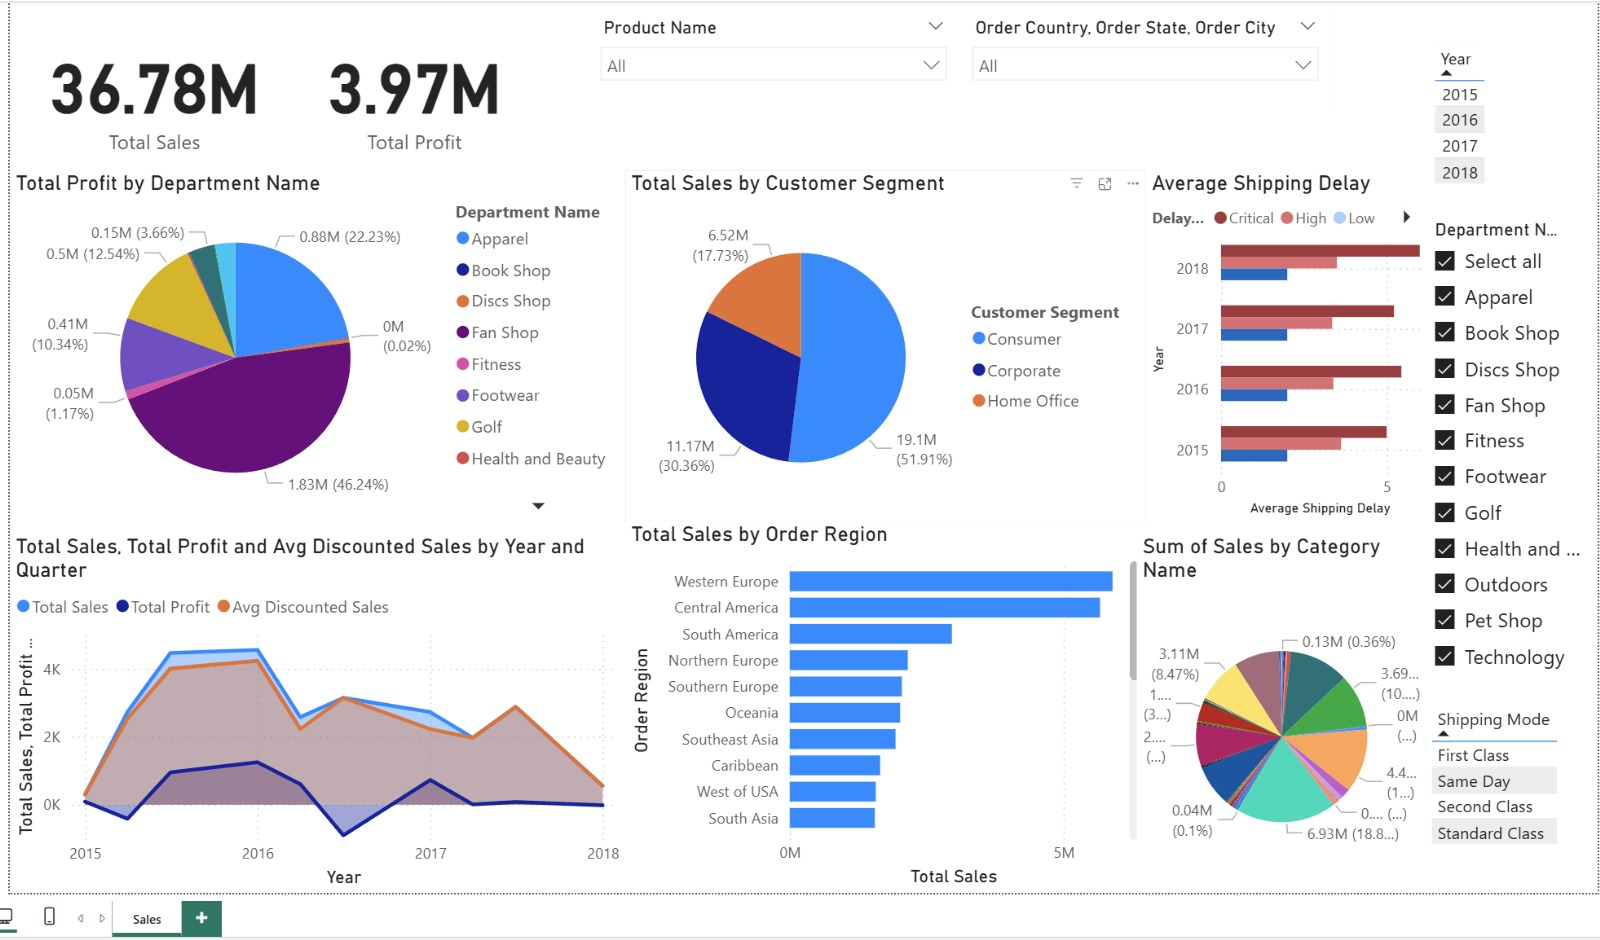

**Figure 0. Overall Power BI report (exported as report_ss.jpg)**

In [6]:
overall_path = "report_ss.jpg"
if os.path.exists(overall_path):
    show_img(overall_path, caption="Figure 0. Overall Power BI report (exported as report_ss.jpg)")
else:
    display(Markdown("> Image not found: `report_ss.jpg`. Place it in this folder.") )

## 1 · Data Model
Fact → Dimension model allowing cross-slicing of sales, profit, and shipping metrics.

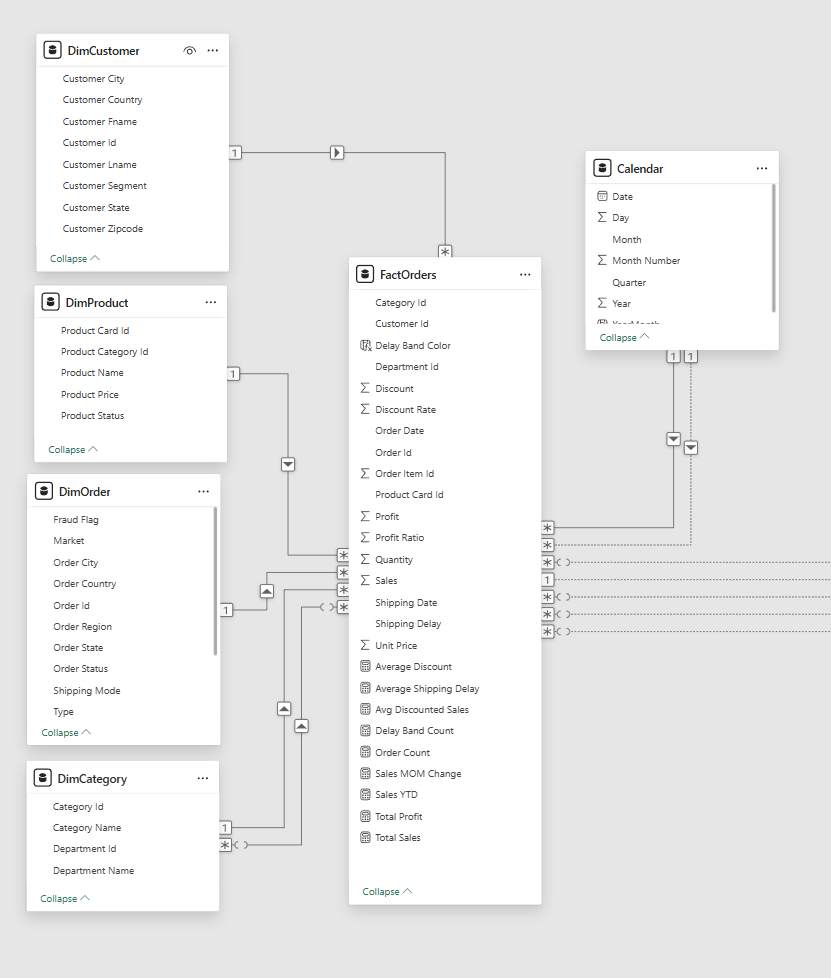

**Figure 1. Data model (model_view.png)**

In [7]:
show_img("model_view.png", caption="Figure 1. Data model (model_view.png)")

### Model Highlights
- **FactOrders** → sales, profit, shipping delay, delivery status.
- **DimCustomer** → geo + segment.
- **DimProduct** → product & category attributes.
- **DimOrder** → market, order status, fraud flag.
- **DimCategory** → department grouping.
- **Calendar** → time intelligence for YTD / trend visuals.

## 2 · DAX KPI Logic
Key measure query captured from the DAX editor view.

```DAX
VAR Total_Sales = SUM('DataCo_SupplyChain_Dataset'[Sales])
VAR Total_Profit = SUMX(
   'DataCo_SupplyChain_Dataset',
   'DataCo_SupplyChain_Dataset'[Order Item Product Price] * 'DataCo_SupplyChain_Dataset'[Order Item Profit Ratio]
 )
VAR Total_Orders = DISTINCTCOUNT('DataCo_SupplyChain_Dataset'[Order Id])
VAR Avg_Order_Value = DIVIDE(Total_Sales, Total_Orders)
VAR Late_Delivery_% = DIVIDE(
   CALCULATE(Total_Sales, 'DataCo_SupplyChain_Dataset'[Delivery Status] = "Late delivery"),
   Total_Sales
)
RETURN ROW("Total Sales", Total_Sales, "Total Profit", Total_Profit, "Orders", Total_Orders, "AOV", Avg_Order_Value, "Late Delivery %", Late_Delivery_%)
```

## 3 · Report States (Interactive Proofs)

### Interpretation
- Visuals respond to slicers → proves measure interactivity.
- KPI cards use dynamic DAX not hard-coded values.
- Hierarchical geo slicer confirms relationships between location fields.
- Fan Shop filter validates department-level profitability.

## 4 · Load Supporting CSVs

In [8]:
for f in ["DataCoSupplyChainDataset.csv", "DescriptionDataCoSupplyChain.csv", "tokenized_access_logs.csv"]:
  if os.path.exists(f):
    df = pd.read_csv(f, encoding="latin-1")
    display(Markdown(f"### Preview of `{f}`"))
    display(df.head())
  else:
    display(Markdown(f"> `{f}` not found in directory."))

### Preview of `DataCoSupplyChainDataset.csv`

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Preview of `DescriptionDataCoSupplyChain.csv`

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


### Preview of `tokenized_access_logs.csv`

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


### Notes
- `DataCoSupplyChainDataset.csv` → main fact data.
- `DescriptionDataCoSupplyChain.csv` → field dictionary.
- `tokenized_access_logs.csv` → ancillary usage / log dataset.

## 5 · Business Insights
**Sales** → 36.78 M total, 3.97 M profit; Consumer segment dominates.



## 6 · References
- Marco Russo & Alberto Ferrari – *The Definitive Guide to DAX* (Microsoft Press)
- Brett Powell – *Power BI Cookbook* (O'Reilly)
- Joe Reis & Matt Housley – *Fundamentals of Data Engineering* (O'Reilly)
- Thomas H. Davenport & Jeanne G. Harris – *Competing on Analytics* (Harvard Business Press)